# Verba Indenizatória CLDF 2017

Com base em arquivo Excel obtido no Portal de Dados Abertos da CLDF vamos analisar os dados de verba indenizatória de 2017

In [14]:
# Importando a biblioteca pandas
import pandas as pd

# Importando o arquivo xls
df = pd.read_excel('verba_indenizatoria_2017.xlsx')

# Exibindo os 5 primeiros registros importados
df.head()

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
0,16,Deputada Liliane Roriz,265.556.111-20,ESTAÇÃO NEWS E PRESTAÇÃO DE SERVIÇOS LTDA - ME,04.428.949/0001-48,2017-01-23,90,500.0
1,16,Deputada Liliane Roriz,265.556.111-20,ASSOCIAÇÃO COMUNITÁRIA DOS MORADORES DAS QNM 1...,2559961000166,2017-02-01,88,500.0
2,16,Deputada Liliane Roriz,265.556.111-20,2M PRODUÇÃO DIGITAL E COMUNICAÇÃO LTDA ME,22425647000106,2017-02-06,89,6000.0
3,16,Deputada Liliane Roriz,265.556.111-20,JORNAL CORREIO DE SANTA MARIA,10902694000106,2017-01-25,207,500.0
4,16,Deputada Liliane Roriz,265.556.111-20,SATÉLITE NOTÍCIAS EVENTOS E PUBLICIDADES LTDA,06.237.055/0001-04,2017-02-28,45,500.0


In [2]:
# O pandas consegue mostrar um resumo quantitativo dos dados contidos no dataframe
# Isso vale apenas para as colunas que contenham valores numéricos
df.describe()

,Gabinete,Valor
count,2718.000000,2718.000000
mean,12.252759,1105.219290
std,7.130658,2126.247326
min,1.000000,15.000000
25%,6.000000,100.000000
50%,10.000000,183.035000
75%,19.000000,450.000000
max,24.000000,11100.000000


In [3]:
# Reconheceu todos os tipos corretamente?
df.dtypes

Gabinete                              int64
Nome                                 object
CPF                                  object
Empresa (ou Profissional)            object
CNPJ (ou CPF)                        object
Data de Emissão              datetime64[ns]
Nº Documento                         object
Valor                               float64
dtype: object

In [4]:
# Quantos reembolsos estao no arquivo
# Porque algumas linhas estão com quantidade menor?
df.count()

Gabinete                     2718
Nome                         2718
CPF                          2718
Empresa (ou Profissional)    2718
CNPJ (ou CPF)                2718
Data de Emissão              2685
Nº Documento                 2716
Valor                        2718
dtype: int64

In [5]:
# Qual a soma de todos as linhas com valores nulos por coluna?
df.isnull().sum()

Gabinete                      0
Nome                          0
CPF                           0
Empresa (ou Profissional)     0
CNPJ (ou CPF)                 0
Data de Emissão              33
Nº Documento                  2
Valor                         0
dtype: int64

In [6]:
# Vamos analisar as linhas onde Nº Documento é nulo
df[df['Nº Documento'].isnull()]

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,não consta cnpj/cpf,NaT,NaN,181.46
1078,2,Deputado Juarezão,265.620.061-04,CEB,não consta cnpj/cpf,NaT,NaN,58.55


Sempre que encontramos valores nulos temos que tomar alguma decisão sobre o que fazer com os dados
- Eliminar completamente o registro?
    - Nesse caso não é interessante porque temos o valor do gasto e isso é mais importante
- Preencher os valores faltantes
    - Podemos buscar pelo CNPJ da Vivo e da CEB e informar os valores
    - Podemos verificar as datas dos registros anteriores e posteriores e supor uma data para o gasto
    - No caso do N Documento não temos o que fazer mas esse valor não afeta a análise

In [15]:
# Vamos encontrar o CNPJ da Vivo
df[df['Empresa (ou Profissional)'] == 'VIVO TELEFÔNICA BRASIL S/A']

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1055,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-06-13,164330,199.07
1066,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-07-07,204904,239.37
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,não consta cnpj/cpf,NaT,NaN,181.46
1085,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-09-11,705577,181.46
1092,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-10-10,68523707,197.30
1115,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-12-11,677919,227.04
1127,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2018-01-12,74732,218.88


In [16]:
# Vamos preencher o valor do CNPJ da Vivo no registro 1076 na coluna 4 (começa de 0)
df.iloc[1076, 4] = '02.558.157/0001-62'

# Verificando se funcionou
df[df['Empresa (ou Profissional)'] == 'VIVO TELEFÔNICA BRASIL S/A']

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1055,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-06-13,164330,199.07
1066,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-07-07,204904,239.37
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,NaT,NaN,181.46
1085,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-09-11,705577,181.46
1092,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-10-10,68523707,197.30
1115,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-12-11,677919,227.04
1127,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2018-01-12,74732,218.88


In [17]:
# Observando os dados podemos notar que o mês faltante no campo Data de Emissão é o mês 08
# Vamos preencher o valor da Data de Emissão no registro 1076 na coluna 5
df.iloc[1076, 5] = '2017-08-01'

# Verificando se funcionou
df[df['Empresa (ou Profissional)'] == 'VIVO TELEFÔNICA BRASIL S/A']

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1055,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-06-13 00:00:00,164330,199.07
1066,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-07-07 00:00:00,204904,239.37
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-08-01,NaN,181.46
1085,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-09-11 00:00:00,705577,181.46
1092,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-10-10 00:00:00,68523707,197.30
1115,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-12-11 00:00:00,677919,227.04
1127,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2018-01-12 00:00:00,74732,218.88


In [18]:
# Ops! Inserimos um texto em um campo que deveria ser uma data
# Precisamos corrigir isso convertendo o texto em data
df.iloc[1076, 5] = pd.to_datetime('2017-08-01')

# Verificando se funcionou
df[df['Empresa (ou Profissional)'] == 'VIVO TELEFÔNICA BRASIL S/A']

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1055,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-06-13 00:00:00,164330,199.07
1066,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-07-07 00:00:00,204904,239.37
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-08-01 00:00:00,NaN,181.46
1085,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-09-11 00:00:00,705577,181.46
1092,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-10-10 00:00:00,68523707,197.30
1115,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-12-11 00:00:00,677919,227.04
1127,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2018-01-12 00:00:00,74732,218.88


In [20]:
# Novamente: Vamos analisar as linhas onde Nº Documento é nulo
df[df['Nº Documento'].isnull()]

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-08-01 00:00:00,NaN,181.46
1078,2,Deputado Juarezão,265.620.061-04,CEB,não consta cnpj/cpf,NaT,NaN,58.55


In [ ]:
# Exercício -> Fazer o mesmo procedimento para a CEB

In [21]:
# Vamos encontrar o CNPJ da CEB
df[df['Empresa (ou Profissional)'] == 'CEB']

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
506,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-01-12 00:00:00,20194,184.50
515,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-02-24 00:00:00,46584,120.95
526,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-03-08 00:00:00,113433,126.89
539,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-04-04 00:00:00,63004,148.71
551,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-05-08 00:00:00,259207,161.14
564,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-06-05 00:00:00,147245,149.99
575,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-07-03 00:00:00,103423,167.42
582,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-08-02 00:00:00,52315,128.89
595,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.669/0001-92,2017-09-11 00:00:00,188335,161.54
607,9,Deputado Chico Vigilante,297.313.721-72,CEB,07.522.169/0001-62,2017-10-02 00:00:00,91686,171.47


In [22]:
# Vamos preencher o valor do CNPJ da CEB no registro 1078 na coluna 4 (começa de 0)
df.iloc[1078, 4] = '07.522.669/0001-92'

# Aproveitando, vamos informar a data
df.iloc[1078, 5] = pd.to_datetime('2017-08-01')

# Novamente: Vamos analisar as linhas onde Nº Documento é nulo
df[df['Nº Documento'].isnull()]

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1076,2,Deputado Juarezão,265.620.061-04,VIVO TELEFÔNICA BRASIL S/A,02.558.157/0001-62,2017-08-01 00:00:00,NaN,181.46
1078,2,Deputado Juarezão,265.620.061-04,CEB,07.522.669/0001-92,2017-08-01 00:00:00,NaN,58.55


In [23]:
# Mas existem mais registros onde a Data de Emissão é nula!
df[df['Data de Emissão'].isnull()]

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
22,16,Deputada Liliane Roriz,265.556.111-20,2M PRODUÇÃO DIGITAL E COMUNICAÇÃO EIRELI ME,não consta cnpj/cpf,NaT,109,6000.00
86,24,Deputada Luzia de Paula,182.811.251-87,KARPER ALUGUEL DE VEÍCULOS S/A,não consta cnpj/cpf,NaT,15395,3200.00
181,8,Deputada Telma Rufino,455.284.891-72,GOES COMBUSTÍVEIS LUBRIFICANTES E GLP LTDA,ILEGÍVEL,NaT,168217,100.00
183,8,Deputada Telma Rufino,455.284.891-72,GOES COMBUSTÍVEIS LUBRIFICANTES E GLP LTDA,ILEGÍVEL,NaT,167528,100.00
212,8,Deputada Telma Rufino,455.284.891-72,DALETH VEÍCULOS LTDA EPP,não consta cnpj/cpf,NaT,881,4500.00
215,8,Deputada Telma Rufino,455.284.891-72,POSTO E MOTEL RODOBELLO EIRELI,ILEGÍVEL,NaT,334594,50.00
248,8,Deputada Telma Rufino,455.284.891-72,POSTO E MOTEL RODOBELLO EIRELI,ILEGÍVEL,NaT,290994,50.00
777,17,Deputado Cláudio Abrantes,444.367.771-20,TRADICIONAL IMOBILIÁRIA,não consta cnpj/cpf,NaT,200025307072,1058.73
796,17,Deputado Cláudio Abrantes,444.367.771-20,VIZION GESTÃO DE NEGÓCIOS EMPRESARIAIS LTDA,não consta cnpj/cpf,NaT,3780097266832,586.00
859,17,Deputado Cláudio Abrantes,444.367.771-20,VIZION GESTÃO DE NEGÓCIOS EMPRESARIAIS LTDA,não consta cnpj/cpf,NaT,139046402,586.00


In [24]:
# Vamos começar a análise
# Qual o somatório dos valores pagos
df.Valor.sum()

3003986.0299999998

In [25]:
# Qual o maior valor pago?
df.Valor.max()

11100.0

In [26]:
# Vamos fazer melhor!
# Quais os 5 maiores gastos?
df.nlargest(5, 'Valor')

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1126,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI - ME,07.713.424/0001-42,2017-11-29 00:00:00,269,11100.0
1054,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-04-28 00:00:00,223,10660.0
1065,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-05-31 00:00:00,228,10660.0
1075,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-06-30 00:00:00,233,10660.0
578,9,Deputado Chico Vigilante,297.313.721-72,CERTA EMPREENDIMENTOS COMÉRCIO E SERVIÇOS LTDA,01.599.219/0001-11,2017-07-31 00:00:00,1988,10650.0


In [27]:
# E os 5 menores gastos?
df.nsmallest(5, 'Valor')

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
892,15,Deputado Cristiano Araújo,976.341.581-00,JT COMERCIO DE DERIVADOS DE PETROLEO LTDA,37.128.477/0001-67,2017-01-03 00:00:00,8940,15.00
2240,19,Deputado Robério Negreiros,696.291.101-72,OI S/A,76.535.764/0001-43,2017-10-20 00:00:00,89256,15.47
277,8,Deputada Telma Rufino,455.284.891-72,AUTO POSTO ESPLANADA LTDA,00.365.320/0001-45,2017-08-22 00:00:00,73770,20.00
321,8,Deputada Telma Rufino,455.284.891-72,ARCO-ÍRIS PETROLEO COM E SERVIÇOS LTDA,00.480.025/0001-30,2017-09-21 00:00:00,195064,20.00
889,15,Deputado Cristiano Araújo,976.341.581-00,POSTO DE COMBUSTÍVEIS 214 SUL LTDA,08.355.825/0001-30,2017-01-04 00:00:00,364,20.00


In [43]:
# Vamos analisar o somatório de gastos de cada deputado
# Para isso vamos agrupar os dados pelo Nome do Deputado e depois somar o campo valor
df.groupby(df['Nome'])['Valor'].sum().sort_values(ascending = False)

Nome
Deputado Chico Vigilante         286759.95
Deputado Rodrigo Delmasso        243339.91
Deputado Robério Negreiros       239654.41
Deputado Ricardo Vale            238523.26
Deputado Lira                    206221.15
Deputado Cláudio Abrantes        205399.96
Deputado Rafael Prudente         202515.13
Deputado Cristiano Araújo        199442.13
Deputado Juarezão                194204.06
Deputado Julio Cesar             182797.70
Deputado Bispo Renato Andrade    164511.46
Deputado Wasny de Roure          125967.25
Deputada Luzia de Paula          108629.92
Deputado Raimundo Ribeiro        103580.76
Deputado Wellington Luiz         101033.00
Deputada Telma Rufino             81721.50
Deputada Liliane Roriz            72890.00
Deputada Sandra Faraj             25504.10
Deputado Professor Israel         21290.38
Name: Valor, dtype: float64

In [28]:
# Voltando aos 5 maiores gastos...
# Quanto a empresa Ficxar Comunicação recebeu no total?
# Vamos criar um dataframe especifico
df_ficxar = df[df['CNPJ (ou CPF)'] == '07.713.424/0001-42']

# Vamos mostrar
df_ficxar

,Gabinete,Nome,CPF,Empresa (ou Profissional),CNPJ (ou CPF),Data de Emissão,Nº Documento,Valor
1046,2,Deputado Juarezão,265.620.061-04,G.R TIBA GRÁFICA ME,07.713.424/0001-42,2017-02-24 00:00:00,218,10250.0
1054,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-04-28 00:00:00,223,10660.0
1065,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-05-31 00:00:00,228,10660.0
1075,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI ME,07.713.424/0001-42,2017-06-30 00:00:00,233,10660.0
1114,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI - ME,07.713.424/0001-42,2017-10-31 00:00:00,262,10250.0
1126,2,Deputado Juarezão,265.620.061-04,FICXAR COMUNICAÇÃO EIRELI - ME,07.713.424/0001-42,2017-11-29 00:00:00,269,11100.0


In [45]:
# Qual o valor total recebido pela empresa
df_ficxar['Valor'].sum()

63580.0

In [29]:
# Agora, vamos separar os registros mês a mês e verificar os valores gastos por mês

# Primeiro nós precisamos converter nossa coluna data de string para datetime
df['Data de Emissão'] = pd.to_datetime(df['Data de Emissão'])


In [30]:
# Sabemos de algumas colunas com Data Nula, mas isso não é problema
# Vamos olhar como estão os dados
df['Data de Emissão'].value_counts()

2017-03-31    34
2017-11-29    30
2017-09-29    28
2017-10-31    27
2017-02-24    26
2017-05-31    26
2017-01-31    24
2017-10-02    23
2017-08-31    22
2017-04-28    21
2017-08-01    20
2017-06-01    18
2017-09-28    18
2017-09-20    17
2017-10-30    16
2017-08-29    16
2017-05-08    16
2017-07-31    16
2017-05-26    16
2017-05-30    16
2017-08-24    16
2017-11-27    16
2017-08-28    15
2017-04-04    15
2017-05-29    15
2017-11-08    14
2017-08-30    14
2017-04-19    14
2017-04-27    14
2017-09-11    14
              ..
2017-07-16     2
2017-08-04     2
2017-03-26     2
2017-11-12     2
2017-01-28     2
2017-12-10     2
2017-05-28     2
2017-02-25     1
2017-10-15     1
2017-04-14     1
2017-01-17     1
2017-07-09     1
2017-12-17     1
2017-01-15     1
2017-07-14     1
2017-12-23     1
2017-04-23     1
2017-07-02     1
2017-07-23     1
2018-01-04     1
2017-04-16     1
2017-04-22     1
2016-01-11     1
2017-01-01     1
2017-01-08     1
2017-03-12     1
2017-01-03     1
2017-04-08    

In [37]:
# Vamos agrupar os valores pelo mês da data de emissão, pegando a soma dos valores por mês
df.groupby(df['Data de Emissão'].dt.month)['Valor'].sum()

Data de Emissão
1.0     227557.03
2.0     210186.96
3.0     262059.48
4.0     245484.66
5.0     269409.65
6.0     286326.42
7.0     173121.69
8.0     271285.22
9.0     222571.44
10.0    258959.30
11.0    246948.58
12.0    275835.51
Name: Valor, dtype: float64

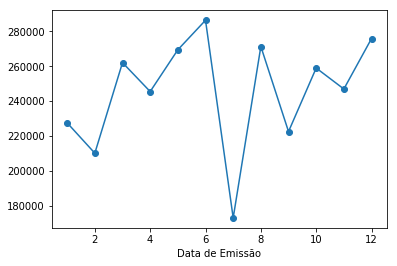

In [41]:
%matplotlib inline

# Vamos mostrar, em grafico, a evolucao mês a mês dos pedidos de reembolso
df.groupby(df['Data de Emissão'].dt.month)['Valor'].sum().plot(style='-o')

In [ ]:
# Exercício
# Melhorar o gráfico usando Matplotlib ou Seaborn
# Começar o eixo X do ZERO
# Mostrar todos os meses no eixo X